<a href="https://colab.research.google.com/github/Nico37-coder/anomaly-detection-fuel-transactions/blob/main/2_Exploraci%C3%B3n_y_Curaci%C3%B3n_de_Datos_compartido28072022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
Memo 13/07/2022 reunión Marce y Nico:

1) KNN puede tenr datos 0 (ceros) pero no NaNs(dato nulo)
2) Ver de imputar datos faltantes de Industrias.

Pasos:
      Actividad 1:
                  a) Seleccionar columnas que no tienen datos faltantes
                  b) Sacar geo_lon, geo_lat, codigo_producto, producto
                  c) Limpiar columna Producto(Diego)
                  d) Eliminar abastecimientos
                  e) Eliminar categoricas que tengan demasiadas categorías
                  f) Analizar lo que hicimos para ver si se puede rescatar algo. Rta: se comento todo esto. Eliminar
      Actividad 2:One-hot
                  a) Sacar columnas con datos faltantes.(industria tiene faltantes)
                  b) Aplicar encoding

      Actividad 3:   KNN          
                  a) Agregar columnas con datos faltantes(industria, id_industria, usersite_id) 
                  y que sean imputables.(sacar inimputables)
                  b) aplicar KNN
                  c) agregar columnas inimputables y asignarle un valor (ej desconocido/D) a estas. 
                  (por ej volumen inicial)


Memo 04/06/2022 reunión Daniela:

1) Imputar o meliminar datos nulos(0) ya que ningún algoritmo va a usar datos nulos(¿?)
2) Producto 0 = Faltante
3) Identificar datos erroneaos ya que son las ANOMALIAS que buscamos
4) Filas:  errores RC y RS hay que eliminarlos. (ver otros codigos de error que se peudan usar)
5) Se pueden hacer dos dataset uno con valores nulos y el otro curado para ir comparando.
6) Eliminar abastecimientos ver codigos error

Memo reunión nuestra 07/06/2022:

1) Descartar columnas geo_latitud y geo_longitud
2) Analizar si descartar las columnas: 'volumen_final', 'volumen_comp_15_final', 'temp_final', 'codigo_producto', 
'volumen_inicial', 'temp_inicial', 'volumen_comp_15_inicial'
En caso de no descartar pensar como se las puede Imputar.
3) Ver si se puede vincular  'veh_site_id y 'id_vehiculo' para vincular e imputar columna 'nombre_prod'(esta columna presennta 
muchos datos faltantes que estan identificados de otra manera por ej "Producto 0")
4) Intentar imputar 'Industria' con columnas 'id_industria' e 'id_empresa' (Ojo puede dar se el caso de una empresa
para la cual tanto 'id_industria' como 'Industria' sea faltante)
5) Procedimiento: Avisar antes de abrir el Colab para no pisarnos
                  Poner comentarios en el Colab
"""                

'\nMemo 13/07/2022 reunión Marce y Nico:\n\n1) KNN puede tenr datos 0 (ceros) pero no NaNs(dato nulo)\n2) Ver de imputar datos faltantes de Industrias.\n\nPasos:\n      Actividad 1:\n                  a) Seleccionar columnas que no tienen datos faltantes\n                  b) Sacar geo_lon, geo_lat, codigo_producto, producto\n                  c) Limpiar columna Producto(Diego)\n                  d) Eliminar abastecimientos\n                  e) Eliminar categoricas que tengan demasiadas categorías\n                  f) Analizar lo que hicimos para ver si se puede rescatar algo. Rta: se comento todo esto. Eliminar\n      Actividad 2:One-hot\n                  a) Sacar columnas con datos faltantes.(industria tiene faltantes)\n                  b) Aplicar encoding\n\n      Actividad 3:   KNN          \n                  a) Agregar columnas con datos faltantes(industria, id_industria, usersite_id) \n                  y que sean imputables.(sacar inimputables)\n                  b) aplicar

<small>Mentoría de la Diplomatura en Ciencia de Datos y sus Aplicaciones - FaMAF UNC 2022.</small>
# Detección de anomalías en despachos de combustible

## Práctico de Exploración y Curación de Datos

**Mentora:** Daniela Bosch

**Integrantes:**

### Introducción

En este trabajo realizamos una exploración en mayor profundidad y dejamos el dataset curado para los próximos trabajos.

Los datos con la descripción de cada una de sus columnas puede encontrarse en el siguiente link: https://www.kaggle.com/datasets/danielabosch/fuel-transactions-from-gas-pump

#### Objetivos del práctico

- Observar datos ruidosos. Diferenciar correctamente los faltantes de los anómalos o mal codificados.
- Obtener un dataset curado para ser utilizado en los próximos trabajos.


### Consignas

Se proponen cuatro actividades de base y dos actividades opcionales. Realizar una breve conclusión sobre el dataset generado.

### Glosario de las variables:

-**unique_id_trans**: Nro de la transacción completo 

-**id_transaccion**: Nro de la transacción, 4 últimos digitos. Id registrado por un nodo IoT. Puede repetirse entre distintos nodos.

-**id_vehiculo**: Id único de unidad de consumo. Puede ser un vehiculo u otra unidad.

-**id_usuario**: Id único del operador encargado de autorizar el despacho.

-**id_equipo**: Id único de nodo IoT. Un nodo pertenece a una estación

-**veh_site_id**: Id de unidad de consumo registrado por el nodo. Puede repetirse entre distintos nodos. Identificador del vehiculo dentro de un mismo sitio.

-**pump_site_id**: Id de surtidor registrado por el nodo. Puede repetirse entre distintos nodos. Identificador de la bomba o pico dentro del mismo sitio.(sitio es cada consola que toma datos)

-**tank_site_id**: Id de tanque registrado por el nodo. Puede repetirse entre nodos.

-**user_site_id**: Id de operador registrado por el nodo. Puede repetirse entre nodos.(4% missing)

-**producto**: Id de producto registrado en el nodo IoT. Puede repetirse entre nodos.

-**id_bomba**: Id único de surtidor.

-**id_tanque**: Id único de tanque conectado a uno o más surtidores.

-**departamento**:Departamento perteneciente al vehículo.

-**cantidad**: Litros transaccionados.(not missing) 

-**codigo_error**: Código de finalización de la operación (No indica necesariamente error). **Ver correlaciones entre codigo de error  y outlaiers.**
                  
                  -C1 51% 
                  
                  -ES 18%
                  
                  -Other 31%

-**timestamp**:Timestamp de inicio de transacción. (*Index*)

-**timestamp_stop**:Timestamp de fin de transacciñon

-**nombre_prod**:Producto despachado
                
                -Diesel 500 15% (Most Common)
                
                -Producto 0 14%
                
                -Other (400856) 71%

-**veh_efficiency**: 

-**volumen_inicial**: Volumen inicial registrado en el tanque(Missing 26%)

-**volumen_final**: Volumen final registrado en el tanque(Missing 39%)

-**temp_inicial**:Temperatura registrada al iniciar la operación.(Missing 26% idem *volumen_inicial*)

-**temp_final**: Temperatura registrada al finalizar la operación.(Missing 39% idem *volumen_final* )

-**volumen_comp_15_inicial**: Volumen inicial registrado en el tanque compensados a 15ºC.(Missing 26% idem *volumen_inicial*)

-**volumen_comp_15_final**:Volumen final registrado en el tanque compensados a 15ºC.(Missing 39% idem *volumen_final* ) 

-**cantidad_comp_15**:Litros despachados compensados a 15ºC 

-**codigo_producto**: Código utilizado por la empresa para identificar productos entre nodos.
                    
                    -null 31%
                    
                    -Product 1 14%
                    
                    -Other 55%

-**geo_latitud**: Geo Latitud (Missing **99%**)

-**geo_longitud**: Geo Longitud (Missing **99%**)

-**id_empresa**: Id único de empresa a la que pertenece la estación

-**id_industria**: Id único de sector de la industria a la que pertenece la empresa(Missing 4%)

-**industria**: Nombre de la industria (Missing 8%)
        
                 -Transportation 36%
        
                 -Service Station 30%
        
                 -Other 34%

In [4]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy


import seaborn
seaborn.set_context('talk')

In [5]:
#Habilitar para google colab

# Script para habilitar el ingreso a una BD local de Google Drive

import io
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    return GoogleDrive(gauth)

def read_pkl_from_drive(drive, id, filename):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_pickle(filename)

def read_csv_from_drive(drive, id, filename):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_csv(
        filename, 
        parse_dates = ["timestamp", "timestamp_stop"],
        dtype = {"departamento" : str}
    )

drive = connect_to_drive()

filename = '1Z6q3ZCzG2j-zhKh2n1xmBL-FoQjzd1KJ'
df = read_csv_from_drive(
    drive, 
    filename, 
    'transacciones_surtidor.csv'
)
df.head(10)


,unique_id_transa,id_transaccion,id_vehiculo,id_usuario,id_equipo,veh_site_id,pump_site_id,tank_site_id,user_site_id,producto,...,temp_final,volumen_comp_15_inicial,volumen_comp_15_final,cantidad_comp_15,codigo_producto,geo_latitud,geo_longitud,id_empresa,id_industria,industria
0,377220101009999,9999,90952,12708,377,000001,1,1,0000,0.0,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,238,1.0,Transportation
1,504220101006768,6768,101866,6683,504,000001,1,1,0000,0.0,...,NaN,NaN,NaN,158.416,Product 1,NaN,NaN,25,5.0,Distributor
2,534220101007334,7334,123844,34280,534,009593,1,1,3532,0.0,...,30.2,17836.50,17728.5,107.850,0000,NaN,NaN,273,1.0,Transportation
3,878220101002206,2206,141769,46520,878,000103,2,1,0000,0.0,...,NaN,6921.42,NaN,80.002,GOM G3,NaN,NaN,1142,2.0,Mining
4,898220101005224,5224,129356,29688,898,999014,2,1,0001,0.0,...,NaN,NaN,NaN,734.900,Diesel 500,NaN,NaN,1083,1.0,Transportation
5,898220101005225,5225,128959,29688,898,050911,4,1,0001,0.0,...,NaN,NaN,NaN,752.655,Diesel 500,NaN,NaN,1083,1.0,Transportation
6,898220101005226,5226,128947,29688,898,050710,4,1,0001,0.0,...,NaN,NaN,NaN,466.937,Diesel 500,NaN,NaN,1083,1.0,Transportation
7,898220101005227,5227,128956,29688,898,050909,4,1,0001,0.0,...,NaN,NaN,NaN,455.825,Diesel 500,NaN,NaN,1083,1.0,Transportation
8,1042220101000129,129,1000827,58310,1042,AAA500,1,1,0000,1.0,...,24.0,41084.10,40867.6,227.935,NaN,NaN,NaN,180,4.0,Agriculture
9,454220101000604,604,58754,5893,454,000003,1,1,0000,0.0,...,NaN,NaN,NaN,109.143,Product 1,NaN,NaN,118,6.0,Service Station


In [6]:
# Importación local dataset (Nico)- eliminar para entregar

#df = pandas.read_csv(r"C:\Users\User\Google Drive\Colab Notebooks\Mentoria\transacciones_surtidor.csv",
    #parse_dates=["timestamp", "timestamp_stop"],
    #dtype={"departamento": str}
#)
#df.head()
#parse_dates para que las columnas de fechas se lean como tal y no como tipo objeto.


#### 1. Análisis de datos faltantes y limpieza

- Realizar un análisis de datos faltantes. Tener en cuenta estos datos pueden presentarse también de formas distintas de acuerdo a la variable (ej. "Producto 0" en la columna de `nombre_prod`).
- Decidir qué columnas se imputarán y cuáles se descartarán.
- Descartar las columnas que no se utilizarán para detectar las anomalías.
- Descartar (si corresponden) las filas que no se consideran parte de este proyecto al tratarse de otro tipo de transacciones (ej. abastecimientos).

> _Muchos valores que pueden considerarse como nulos o faltantes pueden en realidad tratarse de datos erróneos. Tener en cuenta esto al momento de analizarlos y luego imputarlos_.

### 1. Análisis de datos faltantes y limpieza

In [7]:
df.shape

(561747, 32)

Detección las variables con valor cero del dataset

In [8]:
cols = df[df == 0].count(axis=0) # Cuenta la cantidad de ceros(0) en cada columna
cols[cols > 0]

id_transaccion                104
id_vehiculo                   107
id_usuario                  16537
pump_site_id                  212
tank_site_id                  130
producto                   399455
id_bomba                       18
cantidad                    26467
veh_efficiency             476865
volumen_inicial               730
volumen_final                 657
temp_inicial                    2
temp_final                      5
volumen_comp_15_inicial       730
volumen_comp_15_final         669
cantidad_comp_15            26467
id_industria                19835
dtype: int64

Las variables "producto" y "veh_efficiency" tienen una cantidad significativa de valores 0 en relación a los casos totales.

La variable cantidad tiene 26467 valores 0(cero), lo cual llama la atención.

Se seleccionan las transacciones con Cantidad = 0.

In [9]:
df_null = df[(df.cantidad == 0)]
#df_null

In [10]:
df_null['dif'] = df_null['volumen_inicial']- df_null['volumen_final']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_null['cantidad imputada'] = df_null['cantidad'] + df_null['dif']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_null.head()

,unique_id_transa,id_transaccion,id_vehiculo,id_usuario,id_equipo,veh_site_id,pump_site_id,tank_site_id,user_site_id,producto,...,volumen_comp_15_final,cantidad_comp_15,codigo_producto,geo_latitud,geo_longitud,id_empresa,id_industria,industria,dif,cantidad imputada
0,377220101009999,9999,90952,12708,377,000001,1,1,0000,0.0,...,NaN,0.0,NaN,NaN,NaN,238,1.0,Transportation,NaN,NaN
19,159220101005492,5492,59716,5888,159,000000,13,2,0000,0.0,...,22962.4,0.0,Nafta Super,NaN,NaN,45,6.0,Service Station,19.7,19.7
33,159220101005511,5511,59716,5888,159,000000,13,2,0000,0.0,...,22914.5,0.0,Nafta Super,NaN,NaN,45,6.0,Service Station,13.0,13.0
166,833220101003656,3656,140721,46122,833,000029,2,1,1664,0.0,...,NaN,0.0,Gasoil Grado 3,NaN,NaN,1084,2.0,Mining,NaN,NaN
213,159220101005569,5569,59716,5888,159,000000,13,2,0000,0.0,...,22597.3,0.0,Nafta Super,NaN,NaN,45,6.0,Service Station,18.2,18.2


In [13]:
nul_error = df_null.codigo_error.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Nulos', 'codigo_error': 'frequency'})
# Calculamos las frecuencias relativas acumuladas
frecuencia_relativa = nul_error['frequency'].cumsum()
total_defectos = nul_error["frequency"].sum()
nul_error["relativa_acum_porcentual"] = frecuencia_relativa/total_defectos*100
nul_error[:30]

,Nulos,frequency,relativa_acum_porcentual
0,UE,7416,28.019798
1,C1,5907,50.338157
2,ES,2938,61.438773
3,H2,2845,72.188008
4,UL,1776,78.898251
5,C4,1699,85.317565
6,BF,1188,89.806174
7,H1,790,92.791023
8,H4,701,95.439604
9,BE,371,96.841350


In [14]:
df_null_errorUE = df_null[(df_null.codigo_error == 'UE')]

In [15]:
df.info() #tipo de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561747 entries, 0 to 561746
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   unique_id_transa         561747 non-null  int64         
 1   id_transaccion           561747 non-null  int64         
 2   id_vehiculo              561747 non-null  int64         
 3   id_usuario               561747 non-null  int64         
 4   id_equipo                561747 non-null  int64         
 5   veh_site_id              561740 non-null  object        
 6   pump_site_id             561747 non-null  int64         
 7   tank_site_id             561747 non-null  int64         
 8   user_site_id             545281 non-null  object        
 9   producto                 561644 non-null  float64       
 10  id_bomba                 561747 non-null  int64         
 11  id_tanque                561747 non-null  int64         
 12  departamento    

In [16]:
missing_values_count = df.isna().sum() # suma todos los Nan en cada columna
missing_values_count

unique_id_transa                0
id_transaccion                  0
id_vehiculo                     0
id_usuario                      0
id_equipo                       0
veh_site_id                     7
pump_site_id                    0
tank_site_id                    0
user_site_id                16466
producto                      103
id_bomba                        0
id_tanque                       0
departamento                    0
cantidad                        0
codigo_error                    0
timestamp                       0
timestamp_stop                  0
nombre_prod                     0
veh_efficiency                  0
volumen_inicial            147072
volumen_final              217475
temp_inicial               147072
temp_final                 217475
volumen_comp_15_inicial    147072
volumen_comp_15_final      217475
cantidad_comp_15                0
codigo_producto            175530
geo_latitud                555355
geo_longitud               555355
id_empresa    

Veamos cual es el porcentaje de datos faltantes que tiene el dataset.

In [17]:
# how many total missing values do we have?
total_cells = numpy.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

13.700885362983692

Un 14% de datos son faltantes, concentrados en algunas variables. Usando el paquete missingno podemos hacer un análisis gráfico de los datos faltantes.

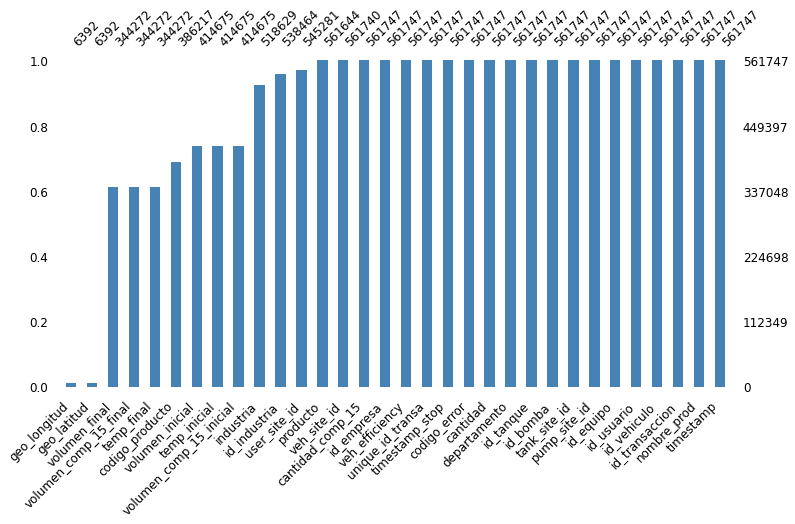

In [18]:
import missingno as msno
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='steelblue') 

#color='steelblue')
#color="dodgerblue")
#color="tab:green")

Podemos ver que catorce columnas no tienen todos sus valores: 'geo_longitud', 'geo_latitud', 'volumen_final', 'volumen_comp_15_final', 'temp_final', 'codigo_producto', 'volumen_inicial', 'temp_inicial', 'volumen_comp_15_inicial', 'industria', 'id_industria', 'user_site_id', 'producto', 'veh_site_id'.

Podemos visualizar las posiciones en el dataset de los datos faltantes usando la matrix(). El gráfico aparece en blanco siempre que falten valores.

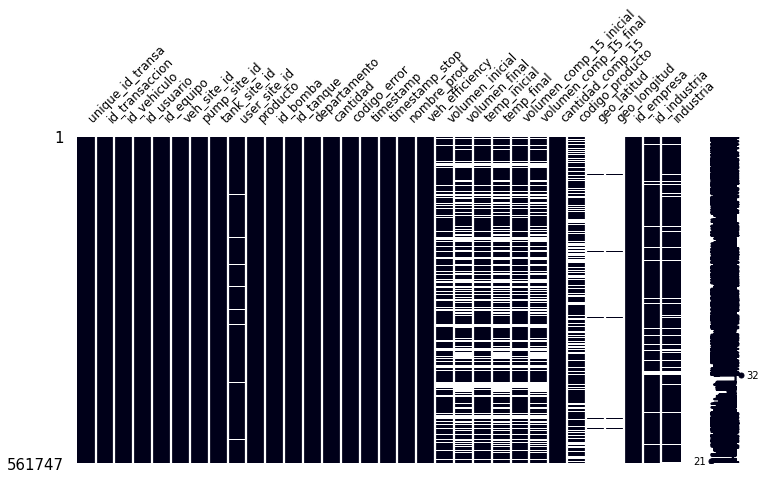

In [19]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.1])

Se observa una correlación entre los datos faltantes de las variables 'volumen_inicial', 'volumen_comp_15_inicial' y 'temp_inicial' (missing 26%) así como una correlación entre 'volumen_final', 'volumen_comp_15_final' y 'temp_final' (missing 39%).

La existencia de correlacion entre la ausencia de datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de perdida. Aun asi, puede existir una relacion entre las variables que permita imputar el dato perdido como funcion de los datos relevados.

      Actividad 1:
                  a) Seleccionar columnas que no tienen datos faltantes
                  b) Sacar geo_lon, geo_lat, codigo_producto, producto
                  c) Limpiar columna Producto(Diego)
                  d) Eliminar abastecimientos
                  e) Eliminar categoricas que tengan demasiadas categorías

Las variables `geo_latitud` y `geo_longitud` no son tenidos en cuenta para la imputación debido a la escasa disponibilidad de datos.

La variable `codigo_producto`  se elimina dado que es un campo asignado arbitrariamente. Por lo tanto debería ser desestimado para la imputación.

La variable `producto` será transformada para poder tenerla en cuenta en el OHE.

A priori las features que necesitaríamos imputar (y que son imputables) son: `veh_site_id`, `user_site_id`, `id_industria`, `industria`

### Trabajamos sobre copia del el 'df' original llamandolo 'data'

In [20]:
data=df.copy()

### Creamos un subconjunto con las variables a utilizar.  

In [21]:
data.columns

Index(['unique_id_transa', 'id_transaccion', 'id_vehiculo', 'id_usuario',
       'id_equipo', 'veh_site_id', 'pump_site_id', 'tank_site_id',
       'user_site_id', 'producto', 'id_bomba', 'id_tanque', 'departamento',
       'cantidad', 'codigo_error', 'timestamp', 'timestamp_stop',
       'nombre_prod', 'veh_efficiency', 'volumen_inicial', 'volumen_final',
       'temp_inicial', 'temp_final', 'volumen_comp_15_inicial',
       'volumen_comp_15_final', 'cantidad_comp_15', 'codigo_producto',
       'geo_latitud', 'geo_longitud', 'id_empresa', 'id_industria',
       'industria'],
      dtype='object')

Eliminando las columnas 'producto',  'geo_latitud',  'geo_longitud' y 'codigo_producto'.

In [22]:
data = data[['unique_id_transa', 'id_transaccion', 'id_vehiculo', 'id_usuario',
       'id_equipo', 'veh_site_id', 'pump_site_id', 'tank_site_id',
       'user_site_id', 'id_bomba', 'id_tanque', 'departamento',
       'cantidad', 'codigo_error', 'timestamp', 'timestamp_stop',
       'nombre_prod', 'veh_efficiency', 'volumen_inicial', 'volumen_final',
       'temp_inicial', 'temp_final', 'volumen_comp_15_inicial',
       'volumen_comp_15_final', 'cantidad_comp_15', 
       'id_empresa', 'id_industria','industria']]

### Eliminar codigos_error de abastecimientos(RC y RS)

In [23]:
#young_df_idx=kgp_df[kgp_df["Age"]<=33].index
#young_folks=kgp_df.drop(young_df_idx)

In [24]:
abast_RC = data[data['codigo_error']=='RC'].index 

In [25]:
abast_RS =  data[data['codigo_error']=='RS'].index

In [26]:
data = data.drop(abast_RC)

In [27]:
data = data.drop(abast_RS)

## Análisis con el subconjunto seleccionado de variables(data)

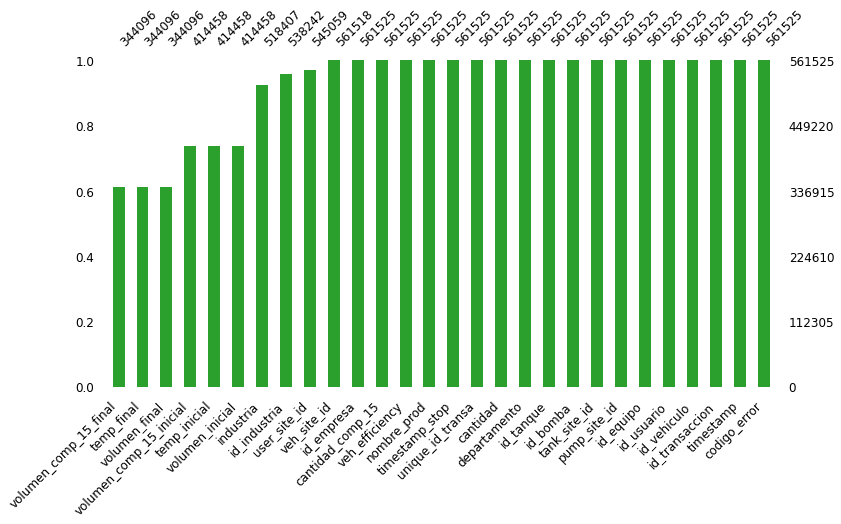

In [28]:
import missingno as msno
msno.bar(data,figsize=(12, 6), sort="ascending",fontsize=12, color='tab:green') 

#color='steelblue')
#color="dodgerblue")
#color="tab:green")

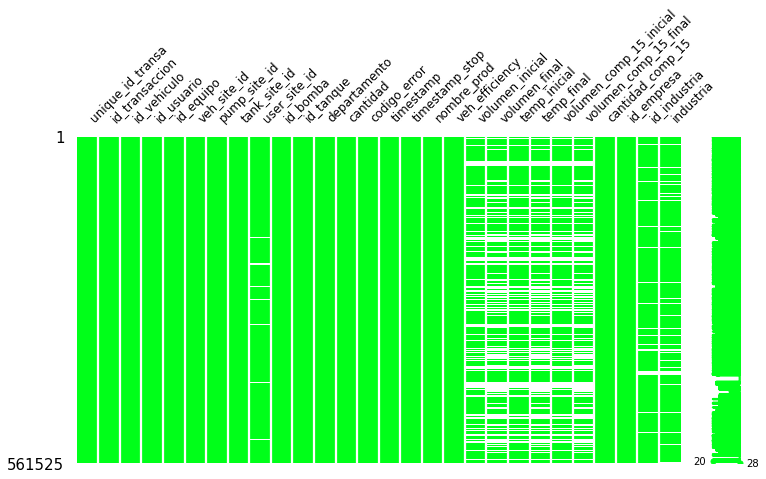

In [29]:
msno.matrix(data,figsize=(12, 6), fontsize=12, color=[0,1,0.1])

In [30]:
data.shape

(561525, 28)

In [31]:
df.shape

(561747, 32)

## Transformación de la variable 'nombre_prod'

In [32]:
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel 500", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Gas Oil", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Gasoil", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Infinia Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DIESEL", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Grado 2", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("GASOIL", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Ultra Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Formula Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel GOM G3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Grado 3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("GOM", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("V-Power Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("VP Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("GAS-OIL - GRADO 3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel 2", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("INFINIA Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("EURODiesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Evolux Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("VP-Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Euro Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Infinia", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Euro Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Infinia'", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Euro-Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Comun", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Euro Gr 3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel grado 2", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Infinia Diésel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel-500", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel 1", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("GAS OIL", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel ", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("COMBUSTIBLE -  Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("ULTRA Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel EURO", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel PPM", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel Premium", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("ULTRADiesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("COMBUSTIBLE -  Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace(" Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselEURO", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselPPM", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Producto 1 -Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("AxionDiesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselGr 2", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Producto 1-Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Producto 2 -Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselGrado3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselG3", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselPremium", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel500", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel ", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("D 500", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselMarítimo", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("BIODiesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("GAS-OIL", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("DieselG2", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Diesel-Diesel", "Diesel"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("QUANTIUMDiesel", "Diesel"))

data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Nafta Super", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("V-Power Nafta", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("VP Nafta", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Infinia", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("INFINIA", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Azul 32", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Comun", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("INFINIA T20", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("nafta", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Super", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Nafta T20", "Nafta"))
data["nombre_prod"] = data["nombre_prod"].apply(lambda x: x.replace("Nafta T40", "Nafta"))

#### 2. Transformación de datos

- Realizar un encoding tipo One Hot de las columnas seleccionadas que no contengan valores nulos.
- Escalar, estandarizar, normalizar los datos si es necesario.
- (Opcional) Se recomienda el uso de Pipelines para realizar estas transformaciones. 

In [33]:
data.info() #tipo de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561525 entries, 0 to 561746
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   unique_id_transa         561525 non-null  int64         
 1   id_transaccion           561525 non-null  int64         
 2   id_vehiculo              561525 non-null  int64         
 3   id_usuario               561525 non-null  int64         
 4   id_equipo                561525 non-null  int64         
 5   veh_site_id              561518 non-null  object        
 6   pump_site_id             561525 non-null  int64         
 7   tank_site_id             561525 non-null  int64         
 8   user_site_id             545059 non-null  object        
 9   id_bomba                 561525 non-null  int64         
 10  id_tanque                561525 non-null  int64         
 11  departamento             561525 non-null  object        
 12  cantidad        

In [34]:
categorical_cols=['nombre_prod', 'codigo_error'] #Ver si hay otras categóricas: industria,'user_site_id' tienen valores nulos8no se tomarían)
numerical_cols=['departamento']
max = 20
categorias = [
    data[col].value_counts()[:max].index.values for col in categorical_cols
]
categorias

[array(['Diesel', 'Nafta', 'Producto 0', 'Product 1', 'Producto 1',
        'Product 2', 'Product 3', 'Producto 2', 'Formula', 'EURO', 'Urea',
        'Euro', 'UREA', 'S1002050010', 'Ultra-Diesel', 'COMUN',
        'Glifosato', 'UD', 'Puerto Seco La Puerta SA', 'Cereales Norte SA'],
       dtype=object),
 array(['C1', 'ES', 'H1', 'C4', 'BF', 'C0', 'C2', 'UE', 'H2', 'BD', 'H4',
        'UL', 'BE', 'H3', 'H5', 'UD', 'BA', 'PR', 'ee', 'B0'], dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(categories=categorias, handle_unknown="ignore",sparse=False)
enc.fit(data[categorical_cols])


enc.categories_

[array(['Diesel', 'Nafta', 'Producto 0', 'Product 1', 'Producto 1',
        'Product 2', 'Product 3', 'Producto 2', 'Formula', 'EURO', 'Urea',
        'Euro', 'UREA', 'S1002050010', 'Ultra-Diesel', 'COMUN',
        'Glifosato', 'UD', 'Puerto Seco La Puerta SA', 'Cereales Norte SA'],
       dtype=object),
 array(['C1', 'ES', 'H1', 'C4', 'BF', 'C0', 'C2', 'UE', 'H2', 'BD', 'H4',
        'UL', 'BE', 'H3', 'H5', 'UD', 'BA', 'PR', 'ee', 'B0'], dtype=object)]

In [36]:
categorias = enc.transform(data[categorical_cols])
categorias

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [37]:
len(categorias)

561525

In [38]:
# armamos el nuevo dataframe
df_numerico = pd.DataFrame(data=data, columns=numerical_cols)
df_numerico.head()

,departamento
0,0000
1,0000
2,0000
3,0014
4,0002


In [39]:
melb_enc = pd.DataFrame(numpy.hstack((df_numerico.values,categorias)))
melb_enc.columns =list(df_numerico.columns.tolist()) + list(enc.get_feature_names_out())

melb_enc

,departamento,nombre_prod_Diesel,nombre_prod_Nafta,nombre_prod_Producto 0,nombre_prod_Product 1,nombre_prod_Producto 1,nombre_prod_Product 2,nombre_prod_Product 3,nombre_prod_Producto 2,nombre_prod_Formula,...,codigo_error_H4,codigo_error_UL,codigo_error_BE,codigo_error_H3,codigo_error_H5,codigo_error_UD,codigo_error_BA,codigo_error_PR,codigo_error_ee,codigo_error_B0
0,0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561520,0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561521,0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561522,0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561523,0000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Escalamos los datos numericos
#KNN Imputer precisa que los datos esten estandarizados.
# Datos con diferentes escalas introducen valores de reemplazo sesgados 
#  Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
melb_scaled = melb_enc.copy(deep=True)
melb_scaled = scaler.fit_transform(melb_scaled[numerical_cols])
melb_scaled

ValueError: ignored

In [41]:
#Acá empieza la parte de Marce ++++++++++++++++++++++++++++++++++++++++

In [42]:
#Confeccionamos un dataset con las features que nos interesan
OHE_df = data[categorical_cols+numerical_cols]

In [43]:
OHE_df.head()

,nombre_prod,codigo_error,departamento
0,Producto 0,UE,0000
1,Product 1,C4,0000
2,Diesel,C1,0000
3,Diesel,C0,0014
4,Diesel,BF,0002


In [44]:
#Confirmamos qué variables son de nuestro interés y cuántos valores distintos hay
OHE_df.nunique()

nombre_prod      24
codigo_error     26
departamento    199
dtype: int64

Se han desestimado las features "id" ya que no representan variables categóricas y tampoco podrían normalizarse.

In [45]:
# Analizamos si existen valores nulos. 
OHE_df.isna().sum()

nombre_prod     0
codigo_error    0
departamento    0
dtype: int64

In [46]:
#One hot encoder compacto 

from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(sparse=False) #Sparse=False nos aseguramos que la matriz sea densa
encoder.fit(data[categorical_cols])
categoric_OHE=encoder.transform(data[categorical_cols])
encoder.fit(data[numerical_cols])
numeric_OHE=encoder.transform(data[numerical_cols])
Dense_df=numpy.hstack((categoric_OHE,numeric_OHE))
print(Dense_df)
print(Dense_df.shape)
print(type(Dense_df))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(561525, 249)
<class 'numpy.ndarray'>


In [47]:
#Calculamos el peso de la matriz densa resultante
matrix_size_mb = Dense_df.shape[0] * Dense_df.shape[1] * 4 / 1024 / 1024 #tamaño de la matriz obtenida por la opcion 1
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

The dense matrix will weight approximately 533.37 MB


Del resultado anterior se obtiene que el peso de la matriz excede la capacidad de procesamiento del KNN. Es por ello que procederemos a fraccionar el dataset para poder entrenar el modelo.

#### 3. Imputación de datos faltantes

- En el caso de haber seleccionado algunas de las columnas con valores faltantes, imputar sus valores con el método y estimador convenientes para poder ser utilizados.
- Realizar el encoding (si corresponde) sobre las columnas imputadas.

In [50]:
# se realiza el metodo de imputación KNN

imputer = IterativeImputer(estimator=KNeighborsRegressor())
melb_imputed = imputer.fit_transform(melb_scaled)
melb_imputed = scaler.inverse_transform(melb_imputed)

melb_imputed = pd.DataFrame(melb_imputed, index=melb_enc[numerical_cols].index, columns=melb_enc[numerical_cols].columns)
(len(melb_imputed),len(melb_enc))

ValueError: ignored

In [ ]:
seaborn.set(rc={'figure.figsize':(8,6)})
ax = seaborn.kdeplot(melb_imputed.volumen_inicial,label="Imputados con knn")
ax = seaborn.kdeplot(melb_enc.volumen_inicial,label="Original")
ax.legend()

#### 4. Guardado del dataset

Luego de realizar las transformaciones generar los siguientes archivos:
- .csv o .pickle con el dataset transformado en el punto 2 que será utilizado en el último práctico.
- .csv o .pickle con el dataset transformado **sin la tranformación de la columna `codigo_error` one hot (si fue incluida en la anterior)**.
- .csv o .pickle con la columna `codigo_error` (o incluirse como una columna extra en el archivo anterior) que será utilizado como label en el próximo práctico.

**Input**: .csv completo.  
**Output**: Uno a tres .csv/.pickle limpios y transformados (según transformaciones realizadas).

In [ ]:
#merged_sales_df.to_csv("df_extended.csv", index=None)

#files.download("df_extended.csv")

#### (Opcional) 5. Reducción de dimensionalidad usando PCA

- Aplicar PCA para reducir las dimensiones del dataset transformado.
- Ahora realizar el mismo procedimiento seleccionando sólo una o dos [  empresas | industrias | productos ].
- Graficar ambos resultados (2 o 3 componentes), observar la dispersión de los datos en el nuevo espacio. 

> _Este proceso puede ser muy lento. A fines de observación puede reducirse el dataset a una semana o un mes._

https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
# X_pca = pca.fit(X)

#### (Opcional) 6. Medias y medianas móviles para observar ouliers

- Graficar las cantidades de las transacciones de una o dos empresas junto a la media móvil y otra con la mediana móvil. Identificar outliers.
- Graficar las cantidades acumuladas de las transacciones de una o dos empresas junto a la media móvil y otra con la mediana móvil del acumulado. Identificar outliers.
- Graficar la media y mediana móvil del residuo de ambas series descompuestas. Identificar outliers.
- **¿Qué resultados se obtienen observando los outliers utilizando medias móviles? ¿Qué resultados se obtienen con la mediana móvil? ¿Cuál funciona mejor y por qué?**

https://anomaly.io/anomaly-detection-moving-median-decomposition/index.html



In [49]:
# Para poder utilizarse un window en tiempo, es necesario que el index sea de tiempo.
# df.rolling('15T')["cantidad"].mean()

### Entregable

Se propone la elaboración de un informe que deberá entregarse en formato de notebook tipo Jupyter o Google Colaboratory, con los resultados guardados, gráficos, notas y conclusiones. El mismo deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.

**Fecha de entrega: 17/06/2022**

### Enlaces útiles
- https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4
- https://anomaly.io/anomaly-detection-moving-median-decomposition/index.html
- https://neptune.ai/blog/anomaly-detection-in-time-series